In [64]:

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# import folium

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import sys
import warnings

warnings.filterwarnings("ignore")

pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

#### Settings ###########
sns.set()
pd.options.display.max_columns = 500
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = [10, 5]
#load_ext nb_black

In [29]:
# barragens -> Dados sobre Barragens brasileiras
barragens = pd.read_csv(
    "datasets/barragens/database_versao_LatLongDecimal_fonteANM_23_01_2019.csv",
    sep=",",
    decimal=",",
    dtype={
        "LATITUDE": "string",
        "LONGITUDE": "string",
        "NOME_BARRAGEM_MINERACAO": "string",
        "CPF_CNPJ": "string",
    },
)

# Primeiras linhas do dataset
barragens.head(3)

,NOME_BARRAGEM_MINERACAO,NOME_DO_EMPREENDEDOR,CPF_CNPJ,POSICIONAMENTO,UF,MUNICIPIO,MINERIO_PRINCIPAL,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE
0,0-1,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,22.00,"27,700,000.00",Baixa,Média,C,Sim,0.733361111111111,-60.1383888888889
1,103 (Cruz),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,10.30,"924,000.00",Baixa,Média,C,Sim,0.785722222222222,-60.1419166666667
2,111 (Índio),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,5.00,"48,873.00",Baixa,Média,C,Sim,0.789666666666667,-60.1442777777778


In [30]:
barragens.shape
barragens.info()

(714, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   NOME_BARRAGEM_MINERACAO   714 non-null    string
 1   NOME_DO_EMPREENDEDOR      714 non-null    object
 2   CPF_CNPJ                  714 non-null    string
 3   POSICIONAMENTO            714 non-null    object
 4   UF                        714 non-null    object
 5   MUNICIPIO                 714 non-null    object
 6   MINERIO_PRINCIPAL         714 non-null    object
 7   ALTURA_ATUAL_metros       714 non-null    object
 8   VOLUME_ATUAL_m3           714 non-null    object
 9   CATEGORIA_DE_RISCO        390 non-null    object
 10  DANO_POTENCIAL_ASSOCIADO  390 non-null    object
 11  CLASSE                    390 non-null    object
 12  INSERIDA_NA_PNSB          714 non-null    object
 13  LATITUDE                  714 non-null    string
 14  LONGITUDE                 

In [31]:
# Precisamos converter os campos de altura e volume de texto para o formato numérico
# Primeiro: troca virgula por espaço vazio. 27,700,700.00 em 27700700.00
barragens["ALTURA_ATUAL_metros"] = barragens["ALTURA_ATUAL_metros"].str.replace(",", "")
# Segundo: vieram hifens representando nulos. Trocar hifen por nulo
barragens["ALTURA_ATUAL_metros"] = barragens["ALTURA_ATUAL_metros"].replace("-", np.nan)
# Terceiro: converte para numerico
barragens["ALTURA_ATUAL_metros"] = pd.to_numeric(barragens["ALTURA_ATUAL_metros"])

barragens["VOLUME_ATUAL_m3"] = barragens["VOLUME_ATUAL_m3"].str.replace(",", "")
barragens["VOLUME_ATUAL_m3"] = barragens["VOLUME_ATUAL_m3"].replace("-", np.nan)
barragens["VOLUME_ATUAL_m3"] = pd.to_numeric(barragens["VOLUME_ATUAL_m3"])

# verifica resultado das alterações
barragens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NOME_BARRAGEM_MINERACAO   714 non-null    string 
 1   NOME_DO_EMPREENDEDOR      714 non-null    object 
 2   CPF_CNPJ                  714 non-null    string 
 3   POSICIONAMENTO            714 non-null    object 
 4   UF                        714 non-null    object 
 5   MUNICIPIO                 714 non-null    object 
 6   MINERIO_PRINCIPAL         714 non-null    object 
 7   ALTURA_ATUAL_metros       697 non-null    float64
 8   VOLUME_ATUAL_m3           707 non-null    float64
 9   CATEGORIA_DE_RISCO        390 non-null    object 
 10  DANO_POTENCIAL_ASSOCIADO  390 non-null    object 
 11  CLASSE                    390 non-null    object 
 12  INSERIDA_NA_PNSB          714 non-null    object 
 13  LATITUDE                  714 non-null    string 
 14  LONGITUDE 

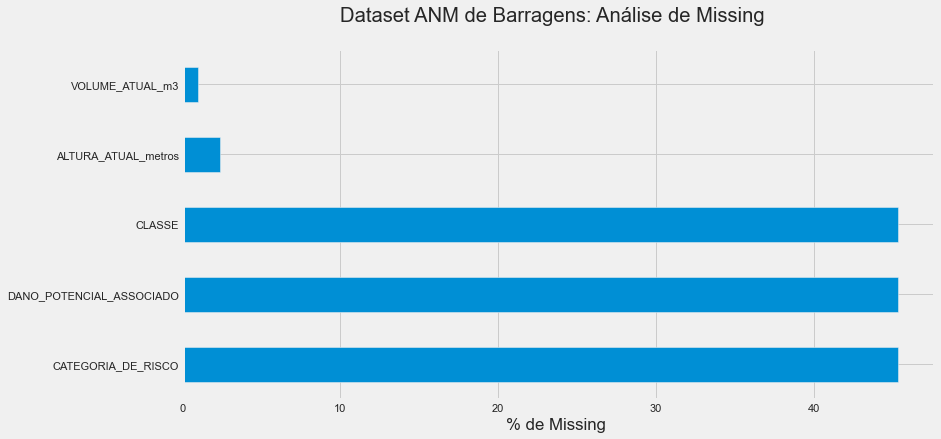

In [35]:
# % DE MISSING
na_cols = [
    col for col in barragens if (barragens[col].isna().sum() > 0)
]  # pega colunas que tem missing
ax = (
    barragens[na_cols]
    .isna()
    .mean()  # percentual de missing
    .sort_values(ascending=False)  # ordena de forma decrescente
    .mul(100)  # em centenas (ao inves de ser 0.45 vai ser 45)
    .plot(kind="barh", figsize=(12, 6))  # plota grafico de barras horizontal
)
_ = ax.set_xlabel("% de Missing ")  # titulo do eixo x
_ = ax.set_title("Dataset ANM de Barragens: Análise de Missing  \n")  # titulo principal

In [37]:
barragens[barragens["CATEGORIA_DE_RISCO"].isna()].head(4)

,NOME_BARRAGEM_MINERACAO,NOME_DO_EMPREENDEDOR,CPF_CNPJ,POSICIONAMENTO,UF,MUNICIPIO,MINERIO_PRINCIPAL,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE
390,22,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,6.0,56519.0,NaN,NaN,NaN,Não,0.738638888888889,-60.1673888888889
391,42,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,4.9,130979.0,NaN,NaN,NaN,Não,0.723527777777778,-60.1967222222222
392,69,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,5.0,84941.0,NaN,NaN,NaN,Não,0.743194444444444,-60.2014166666667
393,189,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,5.0,209969.0,NaN,NaN,NaN,Não,0.789555555555556,-60.0130277777778


In [38]:
barragens["dummy_PNSB"] = np.where(barragens["INSERIDA_NA_PNSB"] == "Sim", 1, 0)
barragens["dummy_PNSB"].value_counts()

1    390
0    324
Name: dummy_PNSB, dtype: int64

In [39]:
barragens["dummy_PNSB"].value_counts(normalize=True)

1    0.546218
0    0.453782
Name: dummy_PNSB, dtype: float64

In [40]:
# Resumo por minerio
resumo = (
    barragens.groupby(["MINERIO_PRINCIPAL"], sort=False)
    .agg(
        sum_pnsb=("dummy_PNSB", "sum"),
        max_altura=("ALTURA_ATUAL_metros", "max"),
        max_volume=("VOLUME_ATUAL_m3", "max"),
        media_altura=("ALTURA_ATUAL_metros", "mean"),
        media_volume=("VOLUME_ATUAL_m3", "mean"),
    )
    .reset_index()
)

resumo.sort_values(by="sum_pnsb").head()

,MINERIO_PRINCIPAL,sum_pnsb,max_altura,max_volume,media_altura,media_volume
56,Sais,0,6.00,6362.07,6.0000,6362.070000
44,Magnesita,0,4.78,52912.30,4.7800,52912.300000
45,Bentonita,0,14.00,7500.00,14.0000,7500.000000
46,Cromita,0,14.60,201205.00,6.7125,73405.428571
47,Areia Quartzosa,0,9.00,6897.00,6.2500,4034.000000


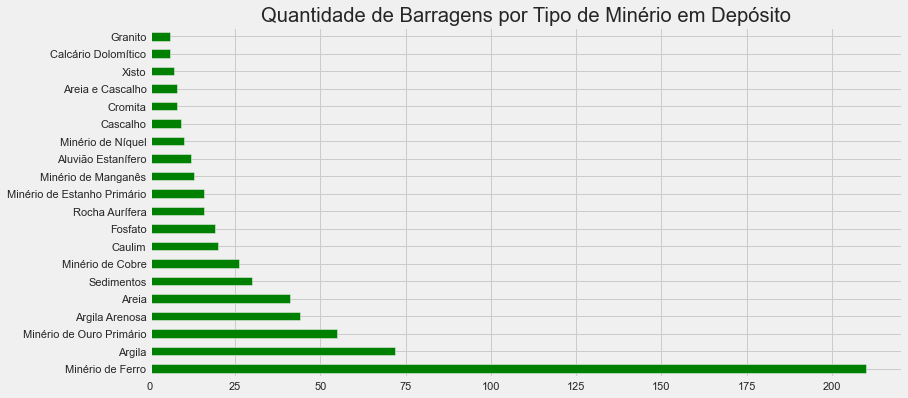

In [41]:

_ = plt.figure(1, figsize=(12, 6))
_ = barragens["MINERIO_PRINCIPAL"].value_counts()[:20].plot(kind="barh", color="green")
_ = plt.title("Quantidade de Barragens por Tipo de Minério em Depósito")

In [42]:

barragens[barragens["MINERIO_PRINCIPAL"] == "Minério de Ferro"].head(5)

,NOME_BARRAGEM_MINERACAO,NOME_DO_EMPREENDEDOR,CPF_CNPJ,POSICIONAMENTO,UF,MUNICIPIO,MINERIO_PRINCIPAL,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE,dummy_PNSB
12,VILA NOVA,Unamgen Mineração e Metalurgia S.a.,42.593.269/0001-79,Norte do Equador,AP,MAZAGÃO,Minério de Ferro,15.5,440300.0,Baixa,Baixa,E,Sim,0.401673888888889,-51.7578088888889,1
38,5 (MAC),Vale S A Filial: Vale Paraopeba,33.592.510/0035-01,Sul do Equador,MG,NOVA LIMA,Minério de Ferro,78.0,13718217.0,Baixa,Alta,B,Sim,-19.9770866666667,-43.8930027777778,1
39,5 (Mutuca),Vale S A Filial: Vale Paraopeba,33.592.510/0035-01,Sul do Equador,MG,NOVA LIMA,Minério de Ferro,55.0,7100000.0,Baixa,Alta,B,Sim,-20.0262258333333,-43.9425625,1
40,7B,Vale S A Filial: Vale Paraopeba,33.592.510/0035-01,Sul do Equador,MG,NOVA LIMA,Minério de Ferro,27.4,79431.0,Baixa,Alta,B,Sim,-19.967365,-43.8829791666667,1
41,8B,Vale S A Filial: Vale Paraopeba,33.592.510/0035-01,Sul do Equador,MG,NOVA LIMA,Minério de Ferro,28.0,92635.0,Baixa,Alta,B,Sim,-19.9594205555556,-43.8726,1


In [46]:
barragens = pd.concat(
    [
        barragens,
        pd.get_dummies(barragens["CATEGORIA_DE_RISCO"], prefix="Categoria_de_Risco"),
    ],
    axis=1,
)

In [49]:
barragens.groupby("CATEGORIA_DE_RISCO")["ALTURA_ATUAL_metros"].mean()

CATEGORIA_DE_RISCO
Alta     28.666667
Baixa    27.960723
Média    16.377273
Name: ALTURA_ATUAL_metros, dtype: float64

In [51]:

barragens.groupby("CATEGORIA_DE_RISCO")["VOLUME_ATUAL_m3"].mean()

CATEGORIA_DE_RISCO
Alta     3.380292e+05
Baixa    8.960697e+06
Média    2.019007e+06
Name: VOLUME_ATUAL_m3, dtype: float64

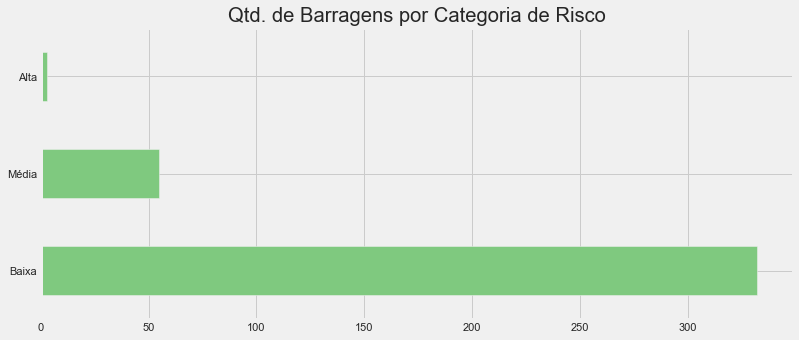

In [52]:
_ = plt.figure(1, figsize=(12, 5))
_ = barragens["CATEGORIA_DE_RISCO"].value_counts().plot(kind="barh", colormap="Accent")
_ = plt.title("Qtd. de Barragens por Categoria de Risco")

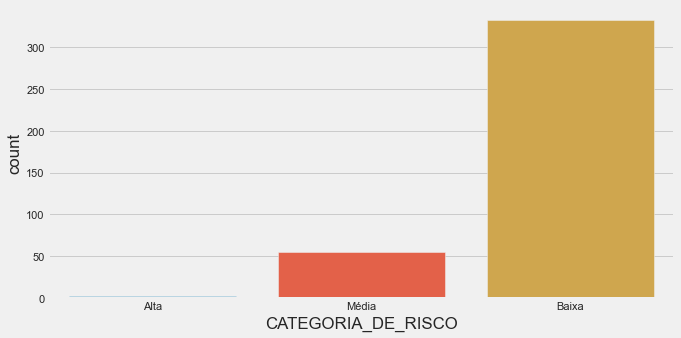

In [53]:
_ = sns.countplot(
    x="CATEGORIA_DE_RISCO",
    data=barragens,
    order=barragens["DANO_POTENCIAL_ASSOCIADO"].value_counts().index,
)

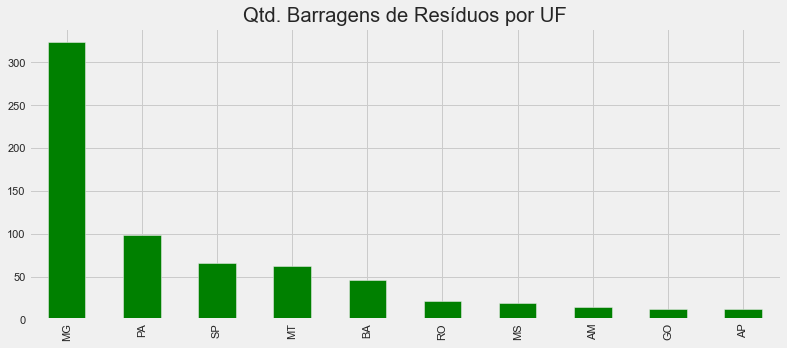

In [56]:
## Quantidade de Barragens X UF
_ = plt.figure(1, figsize=(12, 5))
_ = barragens["UF"].value_counts()[:10].plot(kind="bar", color="green")
_ = plt.title("Qtd. Barragens de Resíduos por UF")

In [57]:
barragens = pd.concat(
    [
        barragens,
        pd.get_dummies(barragens["DANO_POTENCIAL_ASSOCIADO"], "Dano_Potencial_"),
    ],
    axis=1,
)

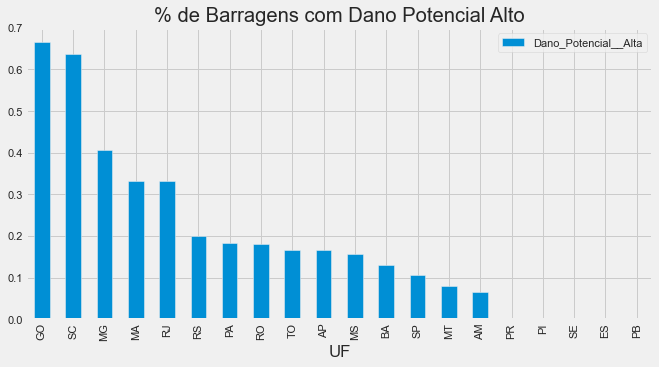

In [58]:

# Algum estado possui mais barragens por risco?
_ = (
    pd.pivot_table(
        data=barragens, index=["UF"], values=["Dano_Potencial__Alta"], aggfunc="mean"
    )
    .sort_values(by="Dano_Potencial__Alta", ascending=False)
    .plot(kind="bar")
)
_ = plt.title("% de Barragens com Dano Potencial Alto")

In [59]:
# Risco de acordo com UF
resumo_por_uf = (
    barragens.groupby(["UF"], sort=False)
    .agg(
        contagem_geral=("Dano_Potencial__Alta", "count"),
        contagem_por_risco_alto=("Dano_Potencial__Alta", "sum"),
        perc_de_risco_alto=("Dano_Potencial__Alta", "mean"),
        Missing_Risco=("CATEGORIA_DE_RISCO", lambda x: x.isnull().mean(),),
        Missing_Dano=("DANO_POTENCIAL_ASSOCIADO", lambda x: x.isnull().mean(),),
    )
    .reset_index()
    .round(1)
)

resumo_por_uf.sort_values(by="contagem_geral", ascending=False).head()

,UF,contagem_geral,contagem_por_risco_alto,perc_de_risco_alto,Missing_Risco,Missing_Dano
6,MG,324,132,0.4,0.4,0.4
9,PA,98,18,0.2,0.3,0.3
16,SP,66,7,0.1,0.7,0.7
8,MT,62,5,0.1,0.5,0.5
2,BA,46,6,0.1,0.7,0.7


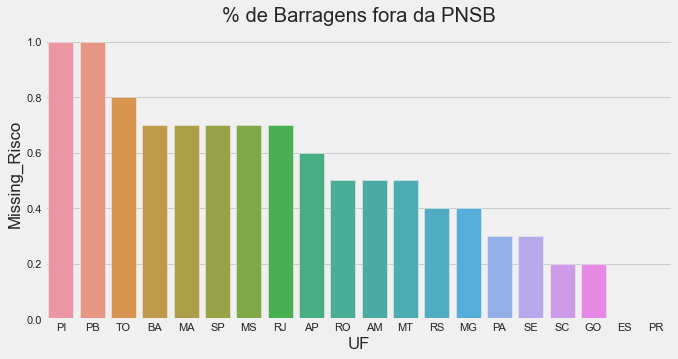

In [61]:
_ = sns.barplot(
    data=resumo_por_uf.sort_values(by="Missing_Risco", ascending=False),
    x="UF",
    y="Missing_Risco",
)
_ = plt.title("% de Barragens fora da PNSB")

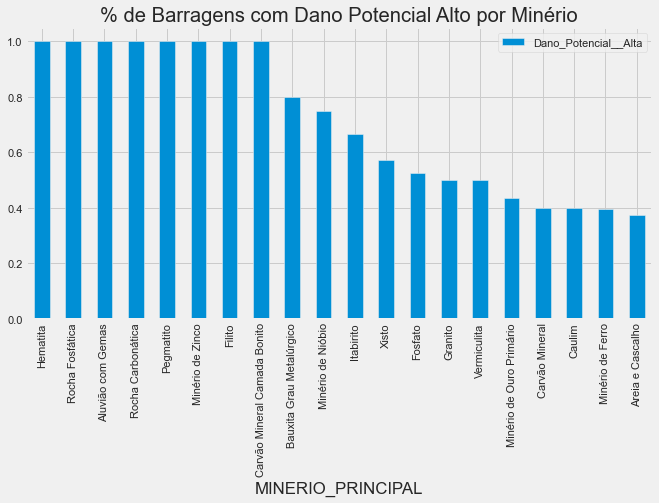

In [63]:

# E o risco por material
_ = (
    pd.pivot_table(
        data=barragens,
        index=["MINERIO_PRINCIPAL"],
        values=["Dano_Potencial__Alta"],
        aggfunc="mean",
    )
    .sort_values(by="Dano_Potencial__Alta", ascending=False)
    .head(20)
    .plot(kind="bar")
)
_ = plt.title("% de Barragens com Dano Potencial Alto por Minério")